In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)  # Отображать все колонки

from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import fbeta_score
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.feature_selection import SequentialFeatureSelector
from datetime import datetime
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import FixedThresholdClassifier

# pip install featuretools

from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer, f1_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix


In [2]:
path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
path_y = 'train_Y.csv'

In [3]:
X_df = pd.read_csv(path_train)
y_df = pd.read_csv(path_y)

In [4]:
df = X_df.join(y_df, how='outer')
display(df.head(3))
df.shape

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0,1.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0,1.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0,1.0


(47363, 22)

In [5]:
df.duplicated().sum() # Колво дубликатов

785

In [6]:
df = df.drop_duplicates()

In [7]:
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
class_weights = {0: 1, 1: 2.9}
sample_weight = np.array([class_weights[y] for y in y_train])

In [9]:
rf = GradientBoostingClassifier(random_state=42, n_estimators=300, max_depth=4)
rf.fit(X_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.830
F-beta на тестовом наборе (beta=sqrt(2)): 0.817


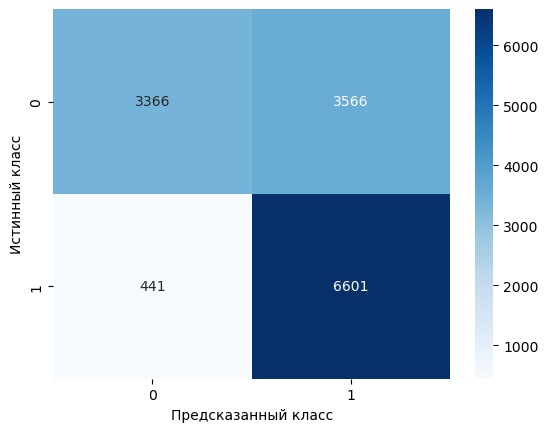

In [10]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()

In [11]:
rf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs = -1, criterion= 'gini', max_features='sqrt', max_depth=10, min_samples_split=9)
rf.fit(X_train, y_train, sample_weight=sample_weight)

y_train_pred = rf.predict(X_train)
f_beta_train = fbeta_score(y_train, y_train_pred, beta=np.sqrt(2))
print(f"F-beta на обучающем наборе (beta=sqrt(2)): {f_beta_train:.3f}")

# Предсказания для тестового набора
y_test_pred = rf.predict(X_test)
f_beta_test = fbeta_score(y_test, y_test_pred, beta=np.sqrt(2))
print(f"F-beta на тестовом наборе (beta=sqrt(2)): {f_beta_test:.3f}")

F-beta на обучающем наборе (beta=sqrt(2)): 0.830
F-beta на тестовом наборе (beta=sqrt(2)): 0.815
